In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use('dark_background')

%matplotlib inline

In [3]:
df = pd.read_csv('./data/College_Data',index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


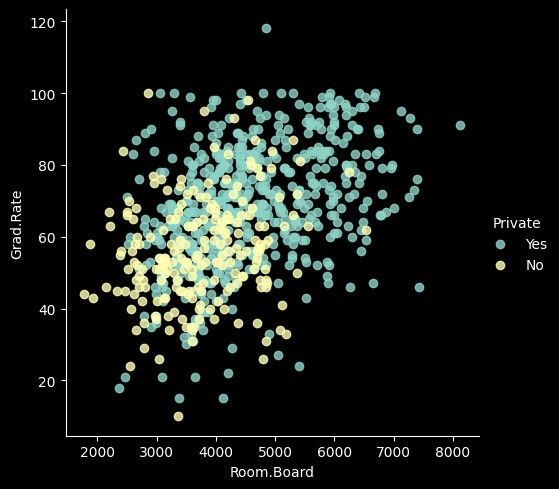

In [7]:
sns.lmplot(data=df, x='Room.Board', y='Grad.Rate',hue='Private', fit_reg=False)

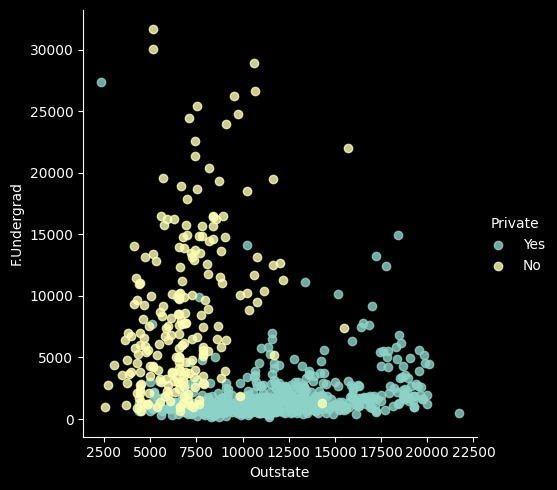

In [8]:
sns.lmplot( data=df, x='Outstate', y='F.Undergrad', hue='Private', fit_reg=False)

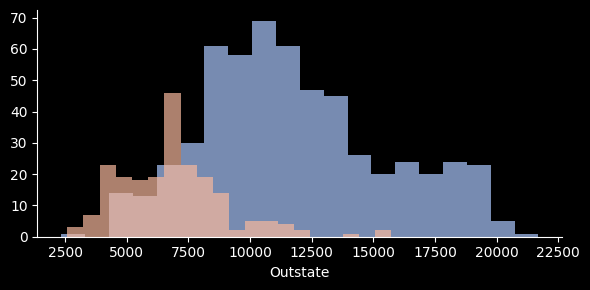

In [12]:
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

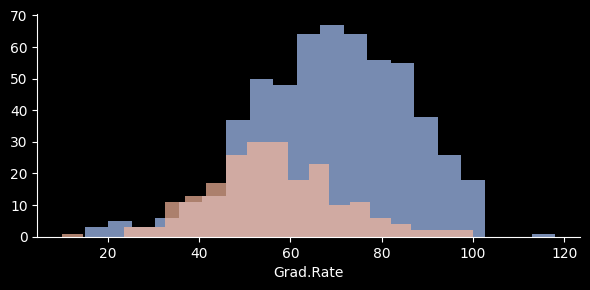

In [13]:
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [14]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [17]:
df.drop(df[df['Grad.Rate'] > 100].index, inplace=True)


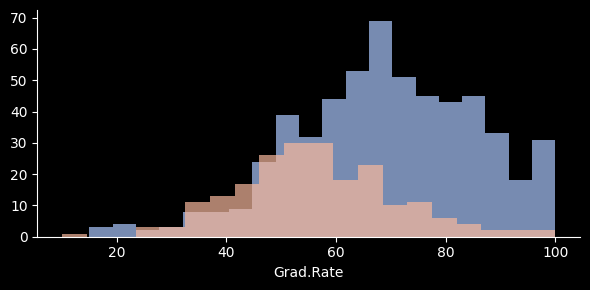

In [19]:
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [46]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2, n_init=10)

In [47]:
kmeans.cluster_centers_

array([[1.81019012e+03, 1.28395359e+03, 4.90991018e+02, 2.53338323e+01,
        5.34985030e+01, 2.19031287e+03, 5.96332335e+02, 1.03972231e+04,
        4.31057335e+03, 5.41895210e+02, 1.28150449e+03, 7.05149701e+01,
        7.78712575e+01, 1.40994012e+01, 2.31796407e+01, 8.93389521e+03,
        6.50404192e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [49]:
target = pd.get_dummies(df['Private']).astype('int')
target.head()

,No,Yes
Abilene Christian University,0,1
Adelphi University,0,1
Adrian College,0,1
Agnes Scott College,0,1
Alaska Pacific University,0,1


In [52]:
print(f"Classification Report:\n{classification_report(target['No'], kmeans.labels_)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(target['No'], kmeans.labels_)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       564
           1       0.69      0.35      0.46       212

    accuracy                           0.78       776
   macro avg       0.74      0.64      0.66       776
weighted avg       0.76      0.78      0.75       776


Confusion Matrix:
[[530  34]
 [138  74]]
